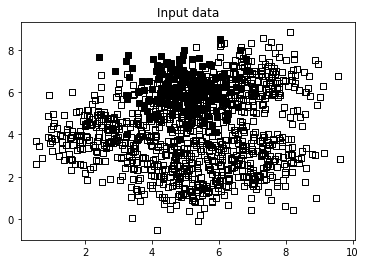

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# load datasets
input_file = 'data_multivar_imbalance.txt'


def load_data(input_file):
    X,Y = [],[]
    with open(input_file,'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data[:-1])
            Y.append(data[-1])
    return np.array(X),np.array(Y)

X,Y = load_data(input_file)

# separate into two classes
class_0 = np.array([X[i] for i in range(len(X)) if Y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if Y[i]==1])
# print(class_0)  ->  <generator object <genexpr> at 0x0000025D2FCFE890>
# print(class_1[:,(0,1)]) -> 表示class_1 的第0,1列

# plot
plt.figure()
plt.scatter(class_0[:,0],class_0[:,1],facecolors='black',edgecolors='black',marker='s')
plt.scatter(class_1[:,0],class_1[:,1],facecolors='None',edgecolors='black',marker='s')
plt.title('Input data')
plt.show()

In [58]:
# visualization
def plot_classifier(classifier, X, y, title='Classifier boundaries', annotate=False):
    # define ranges to plot the figure 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()

    # Set the title
    plt.title(title)

    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray, shading='auto')

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks(())
    plt.yticks(())

    if annotate:
        for x, y in zip(X[:, 0], X[:, 1]):
            # Full documentation of the function available here: 
            # http://matplotlib.org/api/text_api.html#matplotlib.text.Annotation
            plt.annotate(
                '(' + str(round(x, 1)) + ',' + str(round(y, 1)) + ')',
                xy = (x, y), xytext = (-15, 15), 
                textcoords = 'offset points', 
                horizontalalignment = 'right', 
                verticalalignment = 'bottom', 
                bbox = dict(boxstyle = 'round,pad=0.6', fc = 'white', alpha = 0.8),
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))



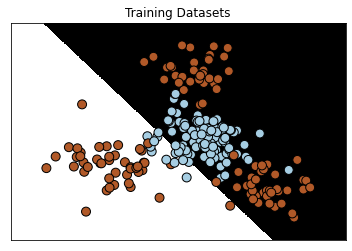

In [59]:
# 线性核函数初始化一个SVM对象
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=5)

params = {"kernel":"linear"}
classifier_svc = SVC(**params)

classifier_svc.fit(X_train,Y_train.astype(int))
plot_classifier(classifier_svc,X_train,Y_train,"Training Datasets")
plt.show()


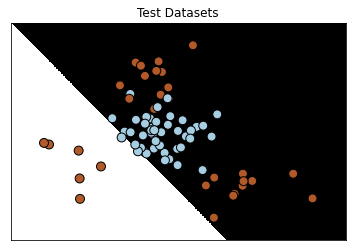


Classifier performance on training datasets

              precision    recall  f1-score   support

     Class-0       0.55      0.88      0.68       105
     Class-1       0.78      0.38      0.51       120

    accuracy                           0.61       225
   macro avg       0.66      0.63      0.59       225
weighted avg       0.67      0.61      0.59       225

              precision    recall  f1-score   support

     Class-0       0.64      0.96      0.77        45
     Class-1       0.75      0.20      0.32        30

    accuracy                           0.65        75
   macro avg       0.70      0.58      0.54        75
weighted avg       0.69      0.65      0.59        75



In [67]:
# 验证分类器对测试数据集的性能
from sklearn.metrics import classification_report

Y_test_pred = classifier_svc.predict(X_test)

# plot test datasets
plot_classifier(classifier_svc,X_test,Y_test,"Test Datasets")
plt.show()

# compute accuracy of test datasets
target_names = ['Class-' + str(int(i)) for i in set(Y)]
print("\nClassifier performance on training datasets\n")
print(classification_report(Y_train, classifier_svc.predict(X_train),target_names=target_names))
print("\nClassifier performance on testing datasets\n")
print(classification_report(Y_test,Y_test_pred,target_names=target_names))

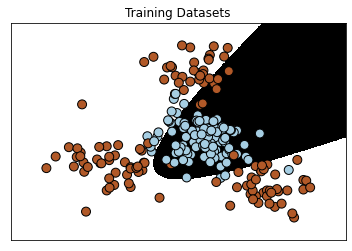

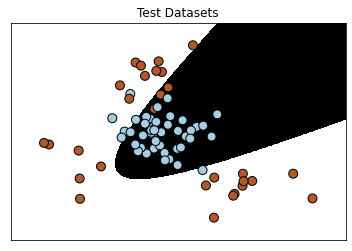


Classifier performance on training datasets

              precision    recall  f1-score   support

     Class-0       0.92      0.84      0.88       105
     Class-1       0.87      0.93      0.90       120

    accuracy                           0.89       225
   macro avg       0.89      0.89      0.89       225
weighted avg       0.89      0.89      0.89       225


Classifier performance on testing datasets

              precision    recall  f1-score   support

     Class-0       0.91      0.89      0.90        45
     Class-1       0.84      0.87      0.85        30

    accuracy                           0.88        75
   macro avg       0.87      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



In [70]:
# 非线性SVM的实现1：多项式函数
params = {'kernel':'poly','degree':3} #三次多项式
classifier_svc = SVC(**params)
classifier_svc.fit(X_train,Y_train.astype(int))
Y_test_pred = classifier_svc.predict(X_test)

plot_classifier(classifier_svc,X_train,Y_train,"Training Datasets")
plt.show()

plot_classifier(classifier_svc,X_test,Y_test,"Test Datasets")
plt.show()

print("\nClassifier performance on training datasets\n")
print(classification_report(Y_train, classifier_svc.predict(X_train),target_names=target_names))
print("\nClassifier performance on testing datasets\n")
print(classification_report(Y_test,Y_test_pred,target_names=target_names))

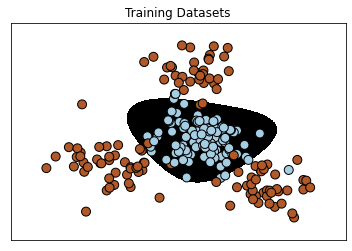

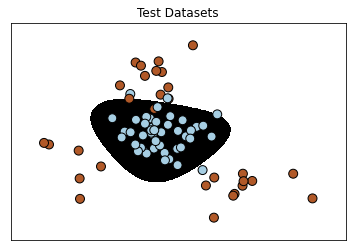


Classifier performance on training datasets

              precision    recall  f1-score   support

     Class-0       0.95      0.96      0.96       105
     Class-1       0.97      0.96      0.96       120

    accuracy                           0.96       225
   macro avg       0.96      0.96      0.96       225
weighted avg       0.96      0.96      0.96       225


Classifier performance on testing datasets

              precision    recall  f1-score   support

     Class-0       0.95      0.93      0.94        45
     Class-1       0.90      0.93      0.92        30

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



In [71]:
# 非线性SVM的实现2：径向基函数
params = {'kernel':'rbf'}
classifier_svc = SVC(**params)
classifier_svc.fit(X_train,Y_train.astype(int))
Y_test_pred = classifier_svc.predict(X_test)

plot_classifier(classifier_svc,X_train,Y_train,"Training Datasets")
plt.show()

plot_classifier(classifier_svc,X_test,Y_test,"Test Datasets")
plt.show()

print("\nClassifier performance on training datasets\n")
print(classification_report(Y_train, classifier_svc.predict(X_train),target_names=target_names))
print("\nClassifier performance on testing datasets\n")
print(classification_report(Y_test,Y_test_pred,target_names=target_names))

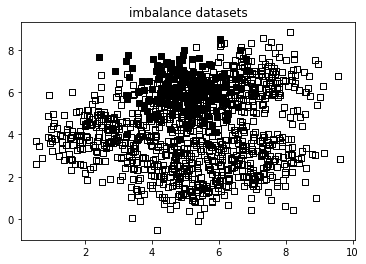

'\n# 线性分类时，找不到边界线：因为分类器不能区分两种类型，导致Class-0的准确性为0\nclassifier_svc = SVC(**params3)\nclassifier_svc.fit(X_train,Y_train)\nplot_classifier(classifier_svc,X_test,classifier_svc.predict(X_test),"Linear Classification for imbalance datassets")\n\ntarget_names = [\'Class-\' + str(int(i)) for i in set(Y)] # Y => set 去重\nprint("\nClassifier performance on imbalance datasets\n")\nprint(classification_report(Y_test, classifier_svc.predict(X_test),target_names=target_names))\n\n# 继续线性分类，当数据分布不平衡时，可以调整权重，统计各类型的数量\nparams4 = {\'kernel\':\'linear\',\'class_weight\':\'balanced\'}\nclassifier_svc = SVC(**params4)\nclassifier_svc.fit(X_train,Y_train)\nplot_classifier(classifier_svc,X_test,classifier_svc.predict(X_test),\'Linear classfication with weight\')\n\ntarget_names = [\'Class-\' + str(int(i)) for i in set(Y)]\nprint("\nClassifier performance on imbalance datasets\n")\nprint(classification_report(Y_test, classifier_svc.predict(X_test),target_names=target_names))\n'

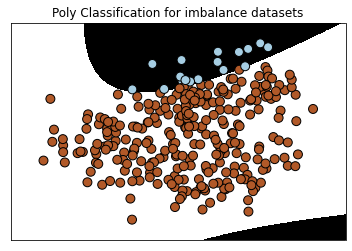

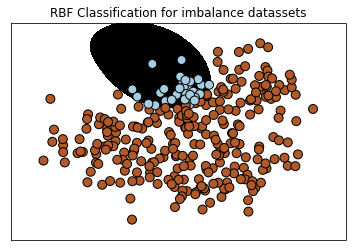

In [89]:
# imbalance datasets
input_file = 'data_multivar_imbalance.txt'
X, Y = load_data(input_file)

class_0 = np.array([X[i] for i in range(len(X)) if Y[i] == 0])
class_1 = np.array([X[i] for i in range(len(X)) if Y[i] == 1])
plt.figure()
plt.scatter(class_0[:,0],class_0[:,1],facecolor='black',edgecolor='black',marker='s')
plt.scatter(class_1[:,0],class_1[:,1],facecolor='None',edgecolor='black',marker='s')
plt.title("imbalance datasets")
plt.show()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state=5)

params1 = {'kernel':'poly','degree':3}
params2 = {'kernel':'rbf'}
params3 = {'kernel':'linear'}

classifier_svc = SVC(**params1)
classifier_svc.fit(X_train,Y_train)
plot_classifier(classifier_svc,X_test,classifier_svc.predict(X_test),"Poly Classification for imbalance datasets")

classifier_svc = SVC(**params2)
classifier_svc.fit(X_train,Y_train)
plot_classifier(classifier_svc,X_test,classifier_svc.predict(X_test),"RBF Classification for imbalance datassets")
'''
# 线性分类时，找不到边界线：因为分类器不能区分两种类型，导致Class-0的准确性为0
classifier_svc = SVC(**params3)
classifier_svc.fit(X_train,Y_train)
plot_classifier(classifier_svc,X_test,classifier_svc.predict(X_test),"Linear Classification for imbalance datassets")

target_names = ['Class-' + str(int(i)) for i in set(Y)] # Y => set 去重
print("\nClassifier performance on imbalance datasets\n")
print(classification_report(Y_test, classifier_svc.predict(X_test),target_names=target_names))

# 继续线性分类，当数据分布不平衡时，可以调整权重，统计各类型的数量
params4 = {'kernel':'linear','class_weight':'balanced'}
classifier_svc = SVC(**params4)
classifier_svc.fit(X_train,Y_train)
plot_classifier(classifier_svc,X_test,classifier_svc.predict(X_test),'Linear classfication with weight')

target_names = ['Class-' + str(int(i)) for i in set(Y)]
print("\nClassifier performance on imbalance datasets\n")
print(classification_report(Y_test, classifier_svc.predict(X_test),target_names=target_names))
'''